In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ogw3-augmented/X_damage_augmented.npy
/kaggle/input/ogw3-augmented/X_freq_augmented.npy
/kaggle/input/ogw3-augmented/X_signals_augmented.npy
/kaggle/input/ogw3-train-test/test_dataset.npz
/kaggle/input/ogw3-train-test/train_dataset.npz
/kaggle/input/ogw3-loaded/data_frames_ogw3.pkl


# 1. Data Loading and Preprocessing 

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [2]:
%pwd

'/kaggle/working'

In [6]:
os.chdir("..")

In [7]:
%pwd

'/kaggle'

In [8]:

%pwd

'/kaggle'

In [9]:
os.chdir("input")

In [11]:
for k, v in obj.items():
    print(k)
    print(v.shape)
    break

data_all_20191121T101124_D3_S5_R2_200kHz.csv
(4369, 66)


In [12]:
len(obj)

2580

In [13]:
baseline_data={}
damage_data={}


In [14]:
# Define the columns to extract (0-based indexing)
# columns_to_extract = [26, 34, 27, 35]  # Columns 27, 35, 28, 36 in 1-based indexing
columns_to_extract = [26]  # Columns 27 in 1-based indexing



In [15]:
# Iterate through the items in the original dictionary
for k, v in obj.items():
    if 'baseline' in k:
        # Check if v is a Pandas DataFrame or NumPy array
        if isinstance(v, pd.DataFrame):
            filtered_data = v.iloc[:, columns_to_extract]  # Use .iloc for Pandas DataFrame
        else:
            filtered_data = v[:, columns_to_extract]  # Use NumPy slicing for arrays
        
        # Store the filtered data in the baseline dictionary
        baseline_data[k] = filtered_data
        
        # Print dimensions for baseline data
        #print(f"Baseline key: {k}, Data shape: {filtered_data.shape}")

    elif 'D1' in k:  # Filter for D1
        # Check if v is a Pandas DataFrame or NumPy array
        if isinstance(v, pd.DataFrame):
            filtered_data = v.iloc[:, columns_to_extract]  # Use .iloc for Pandas DataFrame
        else:
            filtered_data = v[:, columns_to_extract]  # Use NumPy slicing for arrays
        
        # Extract damage size from the key (number after 'S')
        # Split the key by underscores and find the part starting with 'S'
        damage_size_part = [part for part in k.split('_') if part.startswith('S')][0]
        damage_size = int(damage_size_part[1:])  # Extract the number after 'S'
        
        # Store the filtered data and damage size in the damage dictionary
        damage_data[k] = {
            'data': filtered_data,
            'damage_size': damage_size
        }
        
        # Print dimensions for damage data
        #print(f"Damage key: {k}, Data shape: {filtered_data.shape}, Damage size: {damage_size}")


In [16]:
len(baseline_data)

240

In [17]:
print(len(damage_data))

780


In [18]:
# Initialize lists to store all samples and labels
X_all = []
y_all = []

# Add baseline samples
for k, v in baseline_data.items():
    X_all.append(v)  # Shape: (4369, 1)
    y_all.append(0)  # Label for baseline

# Add damage samples
for k, v in damage_data.items():
    X_all.append(v['data'])  # Shape: (4369, 1)
    y_all.append(v['damage_size'])  # Label for damage

# Convert lists to NumPy arrays
X_all = np.array(X_all)  # Shape: (num_samples, 4369, 4)
y_all = np.array(y_all)  # Shape: (num_samples,)

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Print shapes for verification
print(f"Training data shape: {X_train.shape}")  # Should be (num_samples * 0.8, 4369, 4)
print(f"Training labels shape: {y_train.shape}")  # Should be (num_samples * 0.8,)
print(f"Test data shape: {X_test.shape}")  # Should be (num_samples * 0.2, 4369, 4)
print(f"Test labels shape: {y_test.shape}")  # Should be (num_samples * 0.2,)

Training data shape: (816, 4369, 1)
Training labels shape: (816,)
Test data shape: (204, 4369, 1)
Test labels shape: (204,)


In [20]:
def print_label_distribution(y, set_name):
    """Print the distribution of labels in a dataset."""
    print(f"\n{set_name} label distribution:")
    print(f"- Baseline samples (0): {np.sum(y == 0)}")
    for damage_size in range(1, 14):
        print(f"- Damage size {damage_size}: {np.sum(y == damage_size)}")

In [21]:
# Print label distribution for training and test sets
print_label_distribution(y_train, "Training set")
print_label_distribution(y_test, "Test set")


Training set label distribution:
- Baseline samples (0): 197
- Damage size 1: 47
- Damage size 2: 50
- Damage size 3: 52
- Damage size 4: 46
- Damage size 5: 49
- Damage size 6: 43
- Damage size 7: 48
- Damage size 8: 44
- Damage size 9: 49
- Damage size 10: 49
- Damage size 11: 48
- Damage size 12: 45
- Damage size 13: 49

Test set label distribution:
- Baseline samples (0): 43
- Damage size 1: 13
- Damage size 2: 10
- Damage size 3: 8
- Damage size 4: 14
- Damage size 5: 11
- Damage size 6: 17
- Damage size 7: 12
- Damage size 8: 16
- Damage size 9: 11
- Damage size 10: 11
- Damage size 11: 12
- Damage size 12: 15
- Damage size 13: 11


In [22]:
%pwd

'/kaggle/input'

In [23]:
os.chdir("..")
os.chdir("working")

In [24]:
np.savez("train_dataset_D1.npz", X=X_train, y=y_train)
np.savez("test_dataset_D1.npz", X=X_test, y=y_test)

# 1.5) loading augmented data

In [3]:
%pwd

'/kaggle/working'

In [4]:
import os

In [5]:
os.chdir("..")
os.chdir("input")

In [6]:
X_signals_augmented = np.load('ogw3-augmented/X_signals_augmented.npy')
X_damage_augmented = np.load('ogw3-augmented/X_damage_augmented.npy')
X_freq_augmented = np.load('ogw3-augmented/X_freq_augmented.npy')


In [7]:
print(f"X_signals shape:{X_signals_augmented.shape}")
print(f"X_signals shape:{X_damage_augmented.shape}")
print(f"X_signals shape:{X_freq_augmented.shape}")

X_signals shape:(2040, 4369, 1)
X_signals shape:(2040, 14)
X_signals shape:(2040, 12)


In [8]:
import numpy as np

def summarize_data(X, name):
    print(f"Summary for {name}:")
    print("Mean:", np.mean(X, axis=0))
    print("Variance:", np.var(X, axis=0))
    print("Min:", np.min(X, axis=0))
    print("Max:", np.max(X, axis=0))
    print("-" * 50)

summarize_data(X_signals_augmented, "X_signals_augmented")
summarize_data(X_freq_augmented, "X_freq_augmented")


Summary for X_signals_augmented:
Mean: [[-0.00808563]
 [-0.03676917]
 [ 0.00793156]
 ...
 [ 0.43494834]
 [ 0.47826858]
 [ 0.47794448]]
Variance: [[0.04756828]
 [0.05728288]
 [0.05182533]
 ...
 [0.11266843]
 [0.11778735]
 [0.1192308 ]]
Min: [[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]
Max: [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
--------------------------------------------------
Summary for X_freq_augmented:
Mean: [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
Variance: [0.07638889 0.07638889 0.07638889 0.07638889 0.07638889 0.07638889
 0.07638889 0.07638889 0.07638889 0.07638889 0.07638889 0.07638889]
Min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------


In [9]:
import pandas as pd

damage_counts = pd.Series(X_damage_augmented.flatten()).value_counts()
print("Damage Condition Counts:\n", damage_counts)


Damage Condition Counts:
 0.0    26520
1.0     2040
Name: count, dtype: int64


# 2. Execution and model Training
This is where the actual execution starts

In [10]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os

In [11]:
os.chdir("..")
os.chdir("working")

In [12]:
os.chdir("..")
%pwd

'/kaggle'

In [13]:
os.chdir('input/ogw3-train-test')

array([[ 0.0065435 ],
       [ 0.0077284 ],
       [ 0.0057143 ],
       ...,
       [-0.0017008 ],
       [ 0.0015802 ],
       [-0.00081934]])

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

# ----------------------------------------------------------------------
# Step 1: Convert one-hot encoded damage labels to scalar values.
# ----------------------------------------------------------------------
# Each sample in X_damage_augmented is a one-hot vector. We convert it to the
# corresponding class index (i.e., 0 for undamaged, 1-13 for damage levels).
y_augmented = np.argmax(X_damage_augmented, axis=1).astype(np.float32)
# y_augmented now has shape (num_samples,)

In [15]:
y_augmented.min()

0.0

In [16]:
# ----------------------------------------------------------------------
# Step 2: Define the features.
# ----------------------------------------------------------------------
# For this regression task, we use the guided wave signals as the features.
# (If you wish to include frequency information as additional features, you might
# concatenate or process X_freq_augmented separately; here we assume only the signal is used.)
X_augmented = X_signals_augmented  # shape: (num_samples, 4369, 1)

In [17]:
# ----------------------------------------------------------------------
# Step 3: Split the data into training and test sets.
# ----------------------------------------------------------------------
# Here we use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X_augmented, y_augmented, test_size=0.1, random_state=42
)


In [18]:



# ----------------------------------------------------------------------
# Step 4: Verify the shapes of the datasets.
# ----------------------------------------------------------------------
print(f"Training data shape: {X_train.shape}")  # Expected: (num_train_samples, 4369, 1)
print(f"Training labels shape: {y_train.shape}")  # Expected: (num_train_samples,)
print(f"Test data shape: {X_test.shape}")         # Expected: (num_test_samples, 4369, 1)
print(f"Test labels shape: {y_test.shape}")         # Expected: (num_test_samples,)


Training data shape: (1836, 4369, 1)
Training labels shape: (1836,)
Test data shape: (204, 4369, 1)
Test labels shape: (204,)


In [19]:

# # Load training dataset
# train_data = np.load("train_dataset_D1.npz")
# X_train = train_data["X"]  # Load features
# y_train = train_data["y"]  # Load labels

# # Load test dataset
# test_data = np.load("test_dataset_D1.npz")
# X_test = test_data["X"]  # Load features
# y_test = test_data["y"]  # Load labels

# # Verify shapes
# print(f"Training data shape: {X_train.shape}")  # Should be (num_samples, 4369, 4)
# print(f"Training labels shape: {y_train.shape}")  # Should be (num_samples,)
# print(f"Test data shape: {X_test.shape}")  # Should be (num_samples, 4369, 4)
# print(f"Test labels shape: {y_test.shape}")  # Should be (num_samples,)

In [20]:
def print_label_distribution(y, set_name):
    """Print the distribution of labels in a dataset."""
    print(f"\n{set_name} label distribution:")
    print(f"- Baseline samples (0): {np.sum(y == 0)}")
    for damage_size in range(1, 14):
        print(f"- Damage size {damage_size}: {np.sum(y == damage_size)}")

In [21]:
# Print label distribution for training and test sets
print_label_distribution(y_train, "Training set")
print_label_distribution(y_test, "Test set")


Training set label distribution:
- Baseline samples (0): 433
- Damage size 1: 107
- Damage size 2: 107
- Damage size 3: 105
- Damage size 4: 106
- Damage size 5: 105
- Damage size 6: 107
- Damage size 7: 115
- Damage size 8: 109
- Damage size 9: 107
- Damage size 10: 111
- Damage size 11: 109
- Damage size 12: 111
- Damage size 13: 104

Test set label distribution:
- Baseline samples (0): 47
- Damage size 1: 13
- Damage size 2: 13
- Damage size 3: 15
- Damage size 4: 14
- Damage size 5: 15
- Damage size 6: 13
- Damage size 7: 5
- Damage size 8: 11
- Damage size 9: 13
- Damage size 10: 9
- Damage size 11: 11
- Damage size 12: 9
- Damage size 13: 16


In [22]:
# import numpy as np

# def min_max_scale(data):
#     """Normalize each feature (column) to [0, 1]."""
#     min_vals = np.min(data, keepdims=True)  # Min along time steps
#     max_vals = np.max(data, keepdims=True)  # Max along time steps
#     return (data - min_vals) / (max_vals - min_vals + 1e-8)  # Avoid division by zero


In [23]:
# X_train_scaled = np.array([min_max_scale(sample) for sample in X_train])
# X_test_scaled = np.array([min_max_scale(sample) for sample in X_test])


In [24]:
# X_train=X_train_scaled
# X_test=X_test_scaled

In [25]:
# Convert input data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [26]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [27]:
print("Min values after scaling:", np.min(X_train, axis=(1,2)))
print("Max values after scaling:", np.max(X_train, axis=(1,2)))

Min values after scaling: [-1.040155  -0.9812768 -1.        ... -1.        -0.9722817 -0.9399686]
Max values after scaling: [1.0318567  0.94322634 1.         ... 1.         0.9312466  1.0010613 ]


In [28]:
print("X_train dtype:", X_train.dtype)  # Should print float32
print("y_train dtype:", y_train.dtype)  # Should print float32

X_train dtype: float32
y_train dtype: float32


In [53]:
import numpy as np

# Compute the minimum and maximum values from the training targets.
y_min = np.min(y_train)
y_max = np.max(y_train)

# Normalize the training and test targets.
y_train_norm = (y_train - y_min) / (y_max - y_min)
y_test_norm = (y_test - y_min) / (y_max - y_min)


print("Before Normalizing training targets (first 5):", y_train[:5])
print("Before Normalizing test targets (first 5):", y_test[:5])

print("Normalized training targets (first 5):", y_train_norm[:5])
print("Normalized test targets (first 5):", y_test_norm[:5])


Before Normalizing training targets (first 5): [ 5.  3. 13.  1. 10.]
Before Normalizing test targets (first 5): [7. 0. 6. 1. 8.]
Normalized training targets (first 5): [0.3846154  0.23076923 1.         0.07692308 0.7692308 ]
Normalized test targets (first 5): [0.53846157 0.         0.46153846 0.07692308 0.61538464]


# 3. Model Architecture

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [63]:
tf.keras.backend.set_floatx('float32')

In [64]:
# ---------------------------
# 1. Positional Encoding Layer
# ---------------------------
import tensorflow as tf
from tensorflow.keras import layers

def positional_encoding(seq_len, d_model):
    """
    Compute sinusoidal positional encoding.

    Args:
        seq_len: an integer or scalar tensor, the length of the sequence.
        d_model: an integer or scalar tensor, the dimensionality of the encoding.
    
    Returns:
        A tensor of shape (1, seq_len, d_model) containing the positional encoding.
    """
    # Use tf.range to create positions and dimensions.
    positions = tf.cast(tf.range(seq_len), tf.float32)[:, tf.newaxis]  # (seq_len, 1)
    dims = tf.cast(tf.range(d_model), tf.float32)[tf.newaxis, :]         # (1, d_model)
    
    # Compute the angle rates.
    angle_rates = 1 / tf.pow(10000.0, (2 * (dims // 2)) / tf.cast(d_model, tf.float32))
    angle_rads = positions * angle_rates  # (seq_len, d_model)
    
    # Apply sin to even indices; cos to odd indices.
    # Create a mask: even indices (0) get sin, odd indices (1) get cos.
    even_mask = tf.cast(tf.equal(tf.math.floormod(tf.range(d_model), 2), 0), tf.float32)
    odd_mask = 1 - even_mask
    pos_encoding = even_mask * tf.sin(angle_rads) + odd_mask * tf.cos(angle_rads)
    
    # Add the batch dimension.
    pos_encoding = pos_encoding[tf.newaxis, ...]  # (1, seq_len, d_model)
    return pos_encoding

class PositionalEncoding(layers.Layer):
    def __init__(self, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
    
    def call(self, x):
        # x has shape (batch_size, seq_len, d_model)
        seq_len = tf.shape(x)[1]
        d_model = tf.shape(x)[2]
        pos_encoding = positional_encoding(seq_len, d_model)
        return x + pos_encoding
    
    def compute_output_shape(self, input_shape):
        return input_shape


In [65]:
# ---------------------------
# 2. Revised AttentionPooling Layer
# ---------------------------
class AttentionPooling(layers.Layer):
    def __init__(self, output_dim=256):
        super().__init__()
        # Instead of sigmoid activation, we produce logits.
        self.attention_dense = layers.Dense(1, activation=None, kernel_initializer='glorot_uniform')
        self.projection = layers.Dense(output_dim, activation='relu')  # Project to higher dimension
        
    def call(self, inputs):
        # inputs shape: (batch_size, seq_len, feature_dim)
        att_logits = self.attention_dense(inputs)  # (batch_size, seq_len, 1)
        # Use softmax over the time dimension to get a proper attention distribution.
        att_weights = tf.nn.softmax(att_logits, axis=1)  # (batch_size, seq_len, 1)
        weighted_sum = tf.reduce_sum(inputs * att_weights, axis=1)  # (batch_size, feature_dim)
        projected = self.projection(weighted_sum)  # (batch_size, output_dim)
        return projected


In [66]:
# ---------------------------
# 3. Revised Transformer Encoder Block
# ---------------------------
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Self-Attention
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed Forward Network
    y = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    y = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(y)
    y = layers.Dropout(dropout)(y)
    return layers.LayerNormalization(epsilon=1e-6)(y + x)


In [67]:
# ---------------------------
# 4. Revised Regression Model
# ---------------------------
def build_regression_model(input_shape=(4369, 1)):
    inputs = layers.Input(shape=input_shape)

    # Initial Downsampling: 4369 → ~874
    x = layers.MaxPooling1D(pool_size=5, strides=5, padding='same')(inputs)
    
    # Feature Embedding (e.g., now using 64 filters)
    x = layers.Conv1D(64, 3, padding='same', activation='relu')(x)
    
    # Add Positional Encoding
    x = PositionalEncoding()(x)
    
    # Transformer Processing (using your transformer blocks)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    
    # Modified Attention-based Pooling
    x = AttentionPooling(output_dim=1024)(x)
    
    # Regression Head
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='linear')(x)
    
    return tf.keras.models.Model(inputs, outputs)


In [68]:
# ---------------------------
# Multi-GPU setup and Model Compilation
# ---------------------------
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = build_regression_model()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
        loss=tf.keras.losses.Huber(delta=1.5),
        metrics=['mae', 'mse']
    )

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 4369, 1)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 874, 1)         │              0 │ input_layer_5[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_35 (Conv1D)        │ (None, 874, 64)        │            256 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_encoding_5     │ (None, 874, 64)        │              0 │ conv1d_35[0][0]        │
│ (PositionalEncoding)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_15   │ (None, 874, 64)        │         66,368 │ positional_encoding_5… │
│ (MultiHeadAttention)      │                        │                │ positional_encoding_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_51 (Dropout)      │ (None, 874, 64)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_30 (Add)              │ (None, 874, 64)        │              0 │ dropout_51[0][0],      │
│                           │                        │                │ positional_encoding_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_30    │ (None, 874, 64)        │            128 │ add_30[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_36 (Conv1D)        │ (None, 874, 128)       │          8,320 │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_37 (Conv1D)        │ (None, 874, 64)        │          8,256 │ conv1d_36[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_52 (Dropout)      │ (None, 874, 64)        │              0 │ conv1d_37[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_31 (Add)              │ (None, 874, 64)        │              0 │ dropout_52[0][0],      │
│                           │                        │                │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_31    │ (None, 874, 64)        │            128 │ add_31[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_16   │ (None, 874, 64)        │         66,368 │ layer_normalization_3… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_54 (Dropout)      │ (None, 874, 64)        │              0 │ multi_head_attention_… │
├──────────────────────

 Total params: 579,138 (2.21 MB)

 Trainable params: 579,138 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# ---------------------------
# Model Training
# ---------------------------
history = model.fit(
    X_train, y_train_norm,
    validation_data=(X_test, y_test_norm),
    epochs=200,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_mae',
            patience=100,
            restore_best_weights=True
        ),
        # You may consider enabling ReduceLROnPlateau if needed.
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_mae',
            factor=0.5,
            patience=8
        )
    ]
)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.2318 - mae: 0.4774 - mse: 0.5106 - val_loss: 0.0664 - val_mae: 0.3180 - val_mse: 0.1328 - learning_rate: 0.0020
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - loss: 0.0651 - mae: 0.3158 - mse: 0.1303 - val_loss: 0.0619 - val_mae: 0.2948 - val_mse: 0.1238 - learning_rate: 0.0020
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 0.0625 - mae: 0.3067 - mse: 0.1251 - val_loss: 0.0561 - val_mae: 0.2932 - val_mse: 0.1122 - learning_rate: 0.0020
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.0617 - mae: 0.3067 - mse: 0.1235 - val_loss: 0.0577 - val_mae: 0.2905 - val_mse: 0.1155 - learning_rate: 0.0020
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - loss: 0.0594 - mae: 0.3020 - mse: 0.1187 - val_loss: 0.0562 - val_mae: 0.2927 - val_mse: 0.1124 - learning_rate: 0.0020
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - loss: 0.0597 - mae: 0.3009 - mse: 0.1194 - val_loss: 0.0596 - val_mae

KeyboardInterrupt: 

# 4. Model Evaluation #

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
# Assume y_pred_norm are the predictions from your model (normalized)
y_pred_norm = model.predict(X_test).flatten()

# Convert normalized predictions back to the original scale.
y_pred = y_pred_norm * (y_max - y_min) + y_min

print("Predictions in the original scale (first 5):", y_pred[:5])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predictions in the original scale (first 5): [5.668088  5.674719  5.6671085 5.6763244 5.677521 ]


In [76]:
# # Make predictions
# y_pred = model.predict(X_test).flatten()

In [77]:
y_pred

array([5.668088 , 5.674719 , 5.6671085, 5.6763244, 5.677521 , 5.6768823,
       5.6594515, 5.675861 , 5.6777616, 5.680215 , 5.6776276, 5.6762443,
       5.6763887, 5.6764274, 5.6738763, 5.677686 , 5.681264 , 5.664723 ,
       5.6815925, 5.677571 , 5.6748447, 5.673777 , 5.678332 , 5.675443 ,
       5.67642  , 5.658643 , 5.679984 , 5.673828 , 5.677397 , 5.6677465,
       5.6781707, 5.6757298, 5.679057 , 5.674492 , 5.678948 , 5.6765566,
       5.6729565, 5.683544 , 5.675256 , 5.6763334, 5.679797 , 5.6747994,
       5.676473 , 5.6659775, 5.68347  , 5.677221 , 5.679274 , 5.6783557,
       5.6580873, 5.674696 , 5.6610355, 5.6771116, 5.6730556, 5.674208 ,
       5.677837 , 5.680455 , 5.6758957, 5.6758757, 5.6794815, 5.679114 ,
       5.679671 , 5.6774096, 5.6755376, 5.676046 , 5.678502 , 5.658658 ,
       5.676238 , 5.6766286, 5.6790724, 5.65661  , 5.675578 , 5.675203 ,
       5.675558 , 5.676673 , 5.665137 , 5.6702237, 5.665206 , 5.674946 ,
       5.675932 , 5.675949 , 5.677244 , 5.676089 , 

In [78]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"""
Performance Metrics:
- MAE: {mae:.3f}
- MSE: {mse:.3f}
- RMSE: {rmse:.3f}
- R²: {r2:.3f}
""")


Performance Metrics:
- MAE: 3.922
- MSE: 19.788
- RMSE: 4.448
- R²: -0.011



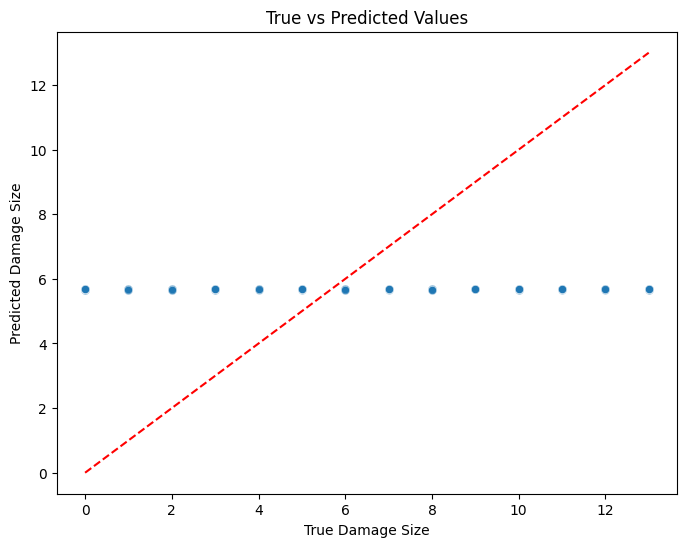

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0,13], [0,13], 'r--')  # Perfect prediction line
plt.xlabel('True Damage Size')
plt.ylabel('Predicted Damage Size')
plt.title('True vs Predicted Values')
plt.show()

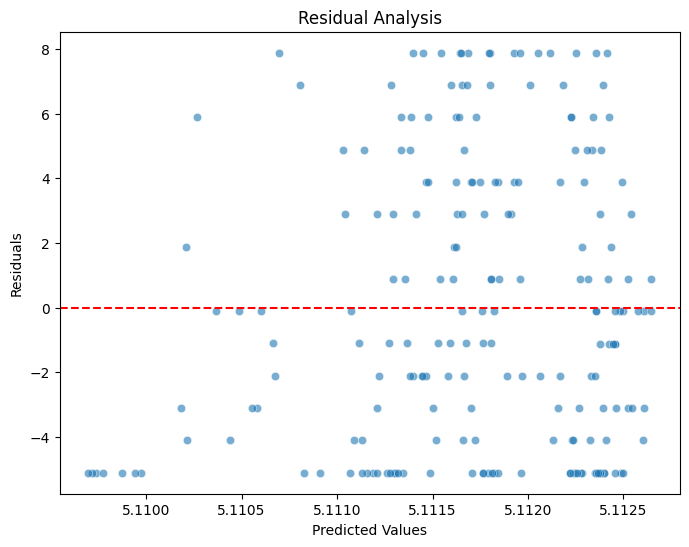

In [43]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


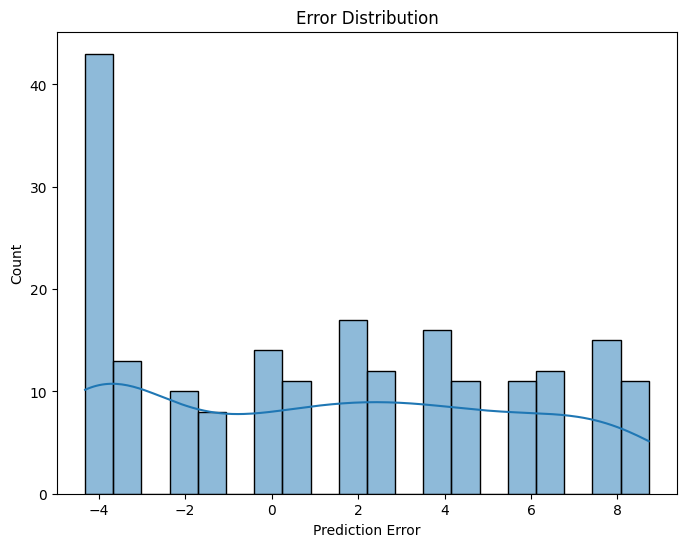

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Prediction Error')
plt.title('Error Distribution')
plt.show()

In [58]:
error_by_size = []
for size in np.unique(y_test):
    mask = y_test == size
    if sum(mask) > 0:  # Check if size exists in test set
        size_mae = mean_absolute_error(y_test[mask], y_pred[mask])
        error_by_size.append((size, size_mae))

# Convert to DataFrame for better visualization
import pandas as pd
error_df = pd.DataFrame(error_by_size, columns=['Damage Size', 'MAE'])
print("\nMAE by Damage Size:")
print(error_df)


MAE by Damage Size:
    Damage Size       MAE
0             0  4.291353
1             1  3.289523
2             2  2.290350
3             3  1.290223
4             4  0.289700
5             5  0.712287
6             6  1.705925
7             7  2.708490
8             8  3.709130
9             9  4.703802
10           10  5.716933
11           11  6.710085
12           12  7.709711
13           13  8.704775


In [59]:
# Separate baseline (label=0) and damage samples
baseline_mask = y_test == 0
damage_mask = y_test > 0

print(f"\nBaseline Performance (False Positives):")
print(f"- MAE: {mean_absolute_error(y_test[baseline_mask], y_pred[baseline_mask]):.3f}")

print(f"\nDamage Performance:")
print(f"- MAE: {mean_absolute_error(y_test[damage_mask], y_pred[damage_mask]):.3f}")


Baseline Performance (False Positives):
- MAE: 4.291

Damage Performance:
- MAE: 3.822


In [60]:
# Find samples with largest errors
worst_indices = np.argsort(np.abs(residuals))[-5:]  # Top 5 worst predictions

print("\nWorst Predictions:")
for idx in worst_indices:
    print(f"True: {y_test[idx]:.1f}, Predicted: {y_pred[idx]:.2f}, Error: {residuals[idx]:.2f}")


Worst Predictions:
True: 13.0, Predicted: 4.30, Error: 8.70
True: 13.0, Predicted: 4.29, Error: 8.71
True: 13.0, Predicted: 4.28, Error: 8.72
True: 13.0, Predicted: 4.28, Error: 8.72
True: 13.0, Predicted: 4.28, Error: 8.72


# simple baseline cnn model

In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [87]:
def build_simple_cnn_model(input_shape=(4369, 1)):
    """
    A simple baseline CNN for regression.
    """
    inputs = layers.Input(shape=input_shape)
    
    # Block 1
    x = layers.Conv1D(32, kernel_size=7, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)  # Downsample by factor of 2
    
    # Block 2
    x = layers.Conv1D(64, kernel_size=5, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)  # Downsample further
    
    # Block 3
    x = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # Global average pooling aggregates over the time dimension.
    x = layers.GlobalAveragePooling1D()(x)
    
    # Fully-connected layers
    x = layers.Dense(128, activation='relu')(x)
    # x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='linear')(x)
    
    model = models.Model(inputs, outputs)
    return model


In [88]:
# Build and compile the model.
model_simple = build_simple_cnn_model()
model_simple.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse',  # Mean Squared Error loss for regression
    metrics=['mae', 'mse']
)

model_simple.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 4369, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_48 (Conv1D)                   │ (None, 4369, 32)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 2184, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_49 (Conv1D)                   │ (None, 2184, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 1092, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_50 (Conv1D)                   │ (None, 1092, 128)           │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 546, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,905 (202.75 KB)

 Trainable params: 51,905 (202.75 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:




# Train the model.
history_simple = model_simple.fit(
    X_train, y_train,  # Use your training data (ensure y_train is the target extent of damage)
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 46.2181 - mae: 5.2083 - mse: 46.2181 - val_loss: 37.5138 - val_mae: 4.6890 - val_mse: 37.5138
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 30.7310 - mae: 4.3887 - mse: 30.7310 - val_loss: 20.2801 - val_mae: 3.9637 - val_mse: 20.2801
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 20.7960 - mae: 4.0332 - mse: 20.7960 - val_loss: 19.8582 - val_mae: 3.8820 - val_mse: 19.8582
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 19.7020 - mae: 3.8896 - mse: 19.7020 - val_loss: 19.8855 - val_mae: 3.8982 - val_mse: 19.8855
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 19.8995 - mae: 3.9008 - mse: 19.8995 - val_loss: 19.8572 - val_mae: 3.8869 - val_mse: 19.8572
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 19.8266 - mae: 3.9184 - mse: 19.8266 - val_loss: 19.8521 - val_mae: 3.8788 - val_mse: 19.8521
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 20.9043 - mae: 4

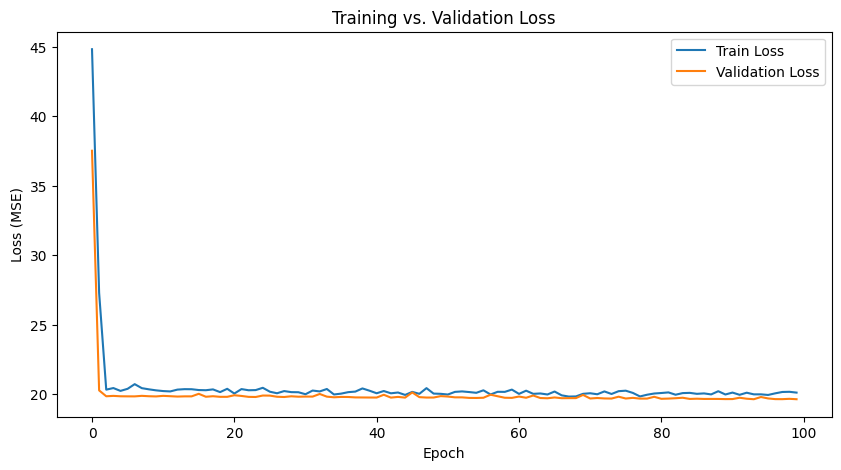

In [84]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()


In [89]:
# Use only a small subset of the training data
small_X_train = X_train[:20]
small_y_train =y_train[:20]

In [90]:
small_y_train

array([ 5.,  3., 13.,  1., 10., 12.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
        3.,  8.,  8., 11.,  8., 12.,  0.], dtype=float32)

In [91]:


history_small = model_simple.fit(
    small_X_train, small_y_train,
    epochs=100,
    batch_size=8,
    verbose=1
)

# Evaluate on the small subset
small_loss = model_simple.evaluate(small_X_train, small_y_train)
print("Loss on small subset:", small_loss)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 665ms/step - loss: 42.8824 - mae: 4.5586 - mse: 42.8824
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.7635 - mae: 4.8205 - mse: 44.7635 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.2050 - mae: 5.3434 - mse: 52.2050 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.3520 - mae: 4.7267 - mse: 44.3520 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.1027 - mae: 5.5108 - mse: 54.1027 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.3284 - mae: 4.7773 - mse: 46.3284 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.2214 - mae: 4.4623 - mse: 41.2214 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.8638 - mae: 5.4217 - mse: 51.8638 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.2557 - mae: 4.1446 - mse: 37.2557 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.8937 - mae: 4.5232 - mse: 41.8937 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

In [94]:
# # Make predictions
y_pred_small = model_simple.predict(small_X_train).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


In [95]:
y_pred_small

array([4.6472235, 4.5814548, 5.0656905, 5.0021515, 5.0364146, 4.99069  ,
       4.643493 , 4.9237328, 5.8475018, 4.6364183, 4.745527 , 4.819878 ,
       4.677476 , 4.8649726, 5.306435 , 5.0078387, 4.361057 , 4.9982266,
       5.043088 , 4.813066 ], dtype=float32)

try converting it again to a classification problem, and see if the model is able to learn any notable patterns